# Deep Learning Basics
The dataset we will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


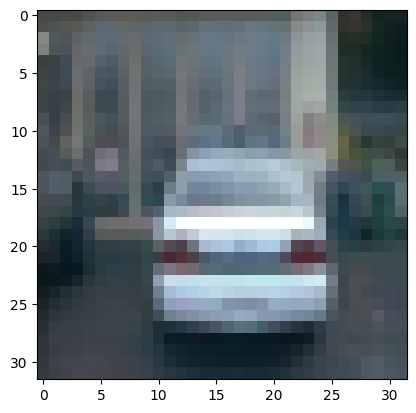

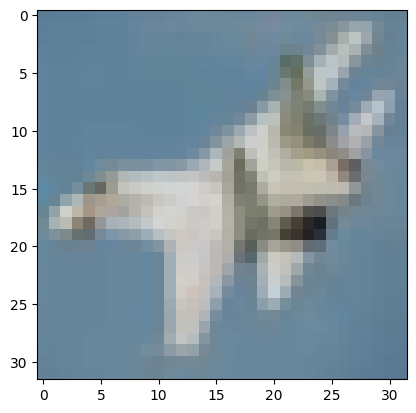

In [3]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

## Nornamlize the data

In [4]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

## NNetwork

- First network: must at least consist of three (03) Convolutional layers, two (02) Fully Connected layers, two (02) Pooling layers.

In [30]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

# Initialize dnn_model as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model = Sequential() # Initialize a sequential model.
dnn_model.add(Conv2D(filters=32, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model.add(Conv2D(filters=64, input_shape=(16, 16, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model.add(Conv2D(filters=128, input_shape=(8, 8, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model.add(Conv2D(filters=256, input_shape=(4, 4, 3), kernel_size=(3,3), activation='softmax', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model.add(Flatten()) # Flatten the vector to 1D
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(75, activation='relu')) # Add FC layer and Relu activation
dnn_model.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_75 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 4, 4, 128)       

In [31]:
# Compile the model
dnn_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = dnn_model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=30, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/30
44/44 [==============================] - 5s 71ms/step - loss: 2.1922 - accuracy: 0.1648 - val_loss: 1.9417 - val_accuracy: 0.2730
Epoch 2/30
44/44 [==============================] - 2s 42ms/step - loss: 1.8934 - accuracy: 0.2979 - val_loss: 1.6867 - val_accuracy: 0.3698
Epoch 3/30
44/44 [==============================] - 2s 43ms/step - loss: 1.6313 - accuracy: 0.3990 - val_loss: 1.4653 - val_accuracy: 0.4592
Epoch 4/30
44/44 [==============================] - 2s 43ms/step - loss: 1.4705 - accuracy: 0.4609 - val_loss: 1.4095 - val_accuracy: 0.4926
Epoch 5/30
44/44 [==============================] - 2s 43ms/step - loss: 1.3513 - accuracy: 0.5060 - val_loss: 1.2676 - val_accuracy: 0.5450
Epoch 6/30
44/44 [==============================] - 2s 41ms/step - loss: 1.2457 - accuracy: 0.5496 - val_loss: 1.1823 - val_accuracy: 0.5760
Epoch 7/30
44/44 [==============================] - 2s 42ms/step - loss: 1.1738 - accuracy: 0.5780 - val_loss: 1.1557 - val_accuracy: 0.5782
Epoch 8/30
44

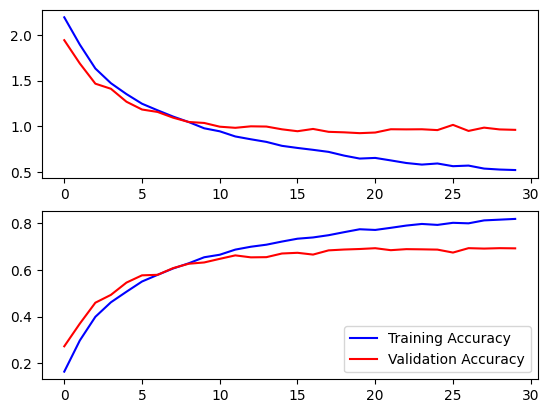

In [34]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [35]:
# Show the model performance
result = dnn_model.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9134 - accuracy: 0.6994
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.9134243130683899, accuracy = 0.699400007724762


 - Second network: has at most 4M (four millions) parameters (use model.summary() to check). The architecture is of your choice.

In [5]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [6]:
# Initialize dnn_model as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model2 = Sequential() # Initialize a sequential model.
dnn_model2.add(Conv2D(filters=32, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model2.add(Conv2D(filters=64, input_shape=(16, 16, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model2.add(Conv2D(filters=128, input_shape=(8, 8, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model2.add(Conv2D(filters=128, input_shape=(8, 8, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer
dnn_model2.add(Conv2D(filters=256, input_shape=(4, 4, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model2.add(Conv2D(filters=256, input_shape=(4, 4, 3), kernel_size=(3,3), activation='softmax', padding='same')) # Add 2D Convolutional layer
dnn_model2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model2.add(Flatten()) # Flatten the vector to 1D
dnn_model2.add(Dropout(0.5)) # Flatten the vector to 1D

dnn_model2.add(Dense(500, activation='relu')) # Add FC layer and Relu activation
dnn_model2.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [41]:
# Compile the model
dnn_model2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = dnn_model2.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=1024, # Batch size
                    epochs=20, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/20
44/44 [==============================] - 5s 67ms/step - loss: 2.1975 - accuracy: 0.1654 - val_loss: 2.0098 - val_accuracy: 0.2514
Epoch 2/20
44/44 [==============================] - 2s 56ms/step - loss: 1.9426 - accuracy: 0.2790 - val_loss: 1.8652 - val_accuracy: 0.3110
Epoch 3/20
44/44 [==============================] - 3s 71ms/step - loss: 1.7539 - accuracy: 0.3415 - val_loss: 1.6563 - val_accuracy: 0.3838
Epoch 4/20
44/44 [==============================] - 3s 62ms/step - loss: 1.6498 - accuracy: 0.3862 - val_loss: 1.5045 - val_accuracy: 0.4482
Epoch 5/20
44/44 [==============================] - 3s 58ms/step - loss: 1.4855 - accuracy: 0.4513 - val_loss: 1.4064 - val_accuracy: 0.4898
Epoch 6/20
44/44 [==============================] - 3s 59ms/step - loss: 1.3729 - accuracy: 0.5003 - val_loss: 1.3467 - val_accuracy: 0.5116
Epoch 7/20
44/44 [==============================] - 3s 58ms/step - loss: 1.2908 - accuracy: 0.5306 - val_loss: 1.2902 - val_accuracy: 0.5346
Epoch 8/20
44

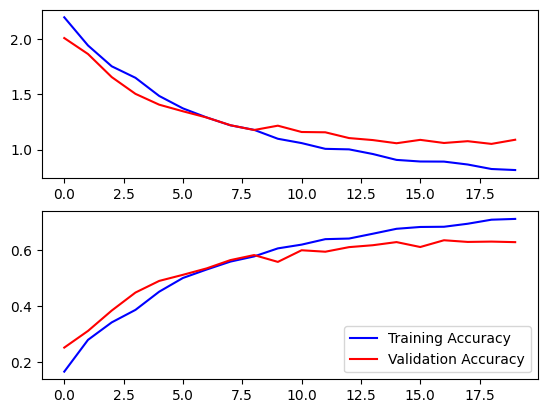

In [42]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [43]:
# Show the model performance
result = dnn_model2.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model2.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 4ms/step - loss: 1.0441 - accuracy: 0.6401
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 1.0441367626190186, accuracy = 0.6401000022888184
